# Maccabi Home Task - DS Position (PART I)

Name: Eitan Boker

This notebook includes the full EDA process end-to-end. Some plots may not provide direct value and are included for completeness. All plots and findings that contributed meaningful insights are documented and elaborated in detail in the accompanying PDF report.

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = [7, 5]
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ds_assignment_data_maccabi.csv')

In [3]:
df.shape

(10000, 157)

## Exploratory Data Analysis

### 1. Missing Values

I'll start by checking how many missing values we have in our dataset:

In [4]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_with_na:
    percent_missing = np.round(df[feature].isnull().mean() * 100, 2)
    print(f"{feature}: {percent_missing}% missing values")

demog_capitationcoefficient: 0.09% missing values
demog_customer_age: 0.09% missing values
smoking_is_smoker: 32.69% missing values
smoking_smoking_years: 32.69% missing values
smoking_total_heavy_smokers: 32.69% missing values
lab_NT_MoM_last_value: 0.39% missing values
lab_NT_abs_last_value: 0.39% missing values
lab_Protein-U_last_value: 42.43% missing values
lab_Monocytes_1_last_value: 0.02% missing values
lab_Mean Platelet Volume (MPV)_last_value: 0.74% missing values
lab_Hemoglobin (HGB)_last_value: 0.03% missing values
lab_Red Blood Cells (RBC)_last_value: 0.02% missing values
lab_Red Cell Count (RCC)_last_value: 0.02% missing values
lab_Mean Corpuscular Hemoglobin (MCH)_last_value: 0.03% missing values
lab_Mean Corpuscular Hemoglobin Concentration (MCHC)_last_value: 0.02% missing values
lab_Platelets (PLT)_last_value: 0.13% missing values
lab_Eosinophils_1_last_value: 0.02% missing values
lab_White Blood Cells (WBC)_last_value: 0.03% missing values
lab_Lymphocytes_1_last_value: 

Most of the missing values are concentrated in the measures and last_diag feature groups.

These missing values are clinically reasonable, as they likely indicate that no measurement or diagnosis was performed at that specific time, rather than a data collection issue.

In [6]:
len(features_with_na)

76

### Since they are many missing values, we need to find the relationship between missing values and Y

I will focus only on null values above 50%:

In [8]:
top_missing_features_50p = (
    df[features_with_na]
    .isnull()
    .mean()
    .loc[lambda x: x > 0.5]
    .sort_values(ascending=False)
    .index
    .tolist()
)

In [9]:
len(top_missing_features_50p)

53

In [10]:
results_non_missing = []

for feature in top_missing_features_50p:
    df_copy = df.copy()
    df_copy['is_not_missing'] = df_copy[feature].notnull().astype(int)

    if df_copy['is_not_missing'].sum() == 0:
        continue
    else:
        percent_y = df_copy[df_copy['is_not_missing'] == 1]['Y'].mean()
        results_non_missing.append({
            'feature': feature,
            'percent_Y_non_missing': percent_y
        })

non_missing_df = pd.DataFrame(results_non_missing)
non_missing_df.sort_values(by='percent_Y_non_missing', ascending=False, inplace=True)

In [11]:
non_missing_df

feature  percent_Y_non_missing
9                     24_diag_53_days_since_last_diag               0.250000
6                      4_diag_98_days_since_last_diag               0.200000
20                    24_diag_83_days_since_last_diag               0.153061
19                    4_diag_118_days_since_last_diag               0.101266
29                    4_diag_124_days_since_last_diag               0.097859
14                    4_diag_130_days_since_last_diag               0.093750
7                     4_diag_114_days_since_last_diag               0.090909
39                    24_diag_81_days_since_last_diag               0.089378
21                    24_diag_71_days_since_last_diag               0.078431
11                    4_diag_108_days_since_last_diag               0.076923
28                    4_diag_132_days_since_last_diag               0.074919
15                    4_diag_110_days_since_last_diag               0.069767
42                    24_diag_69_days_since_last_diag               0.063291
37                    4_diag_100_days_since_last_diag               0.062810
36                     4_diag_94_days_since_last_diag               0.061261
23                    4_diag_140_days_since_last_diag               0.055556
24                    24_diag_63_days_since_last_diag               0.055556
31                    24_diag_87_days_since_last_diag               0.053488
34                    4_diag_128_days_since_last_diag               0.052124
12                    24_diag_75_days_since_last_diag               0.050000
35                    24_diag_67_days_since_last_diag               0.049430
43                    24_diag_59_days_since_last_diag               0.048991
51             measure_blood_pressure_dias_stddev_val               0.048507
44      measure_blood_pressure_sys_first_last_percent               0.048507
45  measure_blood_pressure_sys_last_before_last_pe...               0.048507
46        measure_blood_pressure_dias_min_max_percent               0.048507
47         measure_blood_pressure_sys_min_max_percent               0.048507
48              measure_blood_pressure_sys_stddev_val               0.048507
49  measure_blood_pressure_dias_last_before_last_p...               0.048507
50     measure_blood_pressure_dias_first_last_percent               0.048507
32                    24_diag_85_days_since_last_diag               0.047930
40                    24_diag_55_days_since_last_diag               0.046892
38                    4_diag_122_days_since_last_diag               0.044177
30                    4_diag_116_days_since_last_diag               0.041056
33                     4_diag_92_days_since_last_diag               0.040000
41                    24_diag_61_days_since_last_diag               0.039254
26                    4_diag_134_days_since_last_diag               0.038462
22                    24_diag_79_days_since_last_diag               0.038462
13                    24_diag_57_days_since_last_diag               0.037037
17                     4_diag_96_days_since_last_diag               0.036364
25                    4_diag_104_days_since_last_diag               0.034247
27                    4_diag_112_days_since_last_diag               0.025253
16                    24_diag_65_days_since_last_diag               0.020408
18                    4_diag_138_days_since_last_diag               0.014493
1                     4_diag_136_days_since_last_diag               0.000000
10                    24_diag_77_days_since_last_diag               0.000000
8                     4_diag_102_days_since_last_diag               0.000000
5                     4_diag_120_days_since_last_diag               0.000000
4                     24_diag_73_days_since_last_diag               0.000000
3                     4_diag_106_days_since_last_diag               0.000000
2                     4_diag_126_days_since_last_diag               0.000000
0                      4_diag_90_days_sinc

We can clearly see that the non-missing values in these features have a strong relationship with the target variable Y, indicating their importance. Therefore, we should not discard these features.

However, there are 9 features where the non-missing rows have a 0% rate of Y=1, suggesting they provide no predictive value — these features can be safely removed in later stages of the pipeline.

## 2. Dependent Feautre (Y Target)

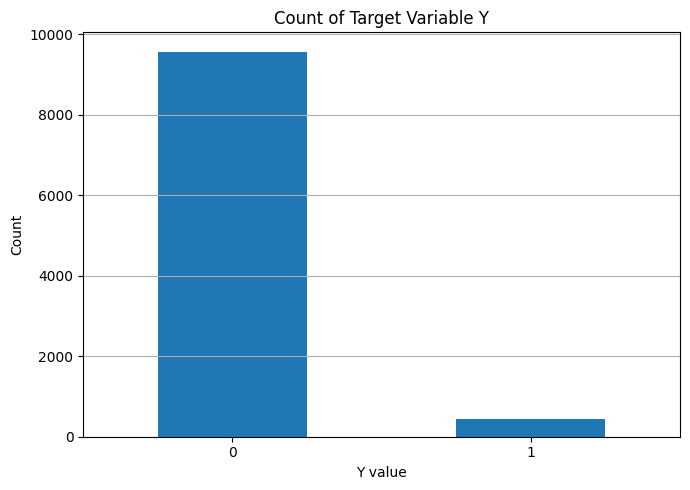

Y
0    95.68
1     4.32
Name: proportion, dtype: float64

In [17]:
import matplotlib.pyplot as plt

df['Y'].value_counts().plot(kind = 'bar')
plt.title('Count of Target Variable Y')
plt.xlabel('Y value')
plt.ylabel('Count')
plt.xticks(ticks = [0, 1], labels = ['0', '1'], rotation = 0)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

# Percentage of Y
y_percentage = df['Y'].value_counts(normalize = True) * 100
y_percentage

The target variable Y is imbalanced, as expected, with a significantly lower proportion of positive cases (Y=1) compared to negative ones (Y=0).

## 3. Independent Feautres

### Functions

Functions Used in This Section:

    1. Statistics Plot (Boxplot + Histogram)
    A combined visualization showing the distribution of each numeric feature by target class (Y) using a boxplot and a KDE/histogram. This helps identify differences in central tendency, spread, and shape between classes.
    
    2. Pearson Correlation with Target
    Calculates the Pearson correlation coefficient between each numeric feature and the binary target variable Y.
    
    3. Highly Correlated Feature Pairs
    Extracts pairs of numeric features with an absolute Pearson correlation above 0.8 to detect multicollinearity, which may impact model performance in later stages.


In [18]:
def statistics_plots(df, feature_list):
    """
    Plots boxplots and KDE plots (histogram) for each feature in feature_list grouped by the 'Y' feature.
    """
    palette = {'0': 'lightgreen', '1': 'lightcoral'}
    colors = {0: 'lightgreen', 1: 'lightcoral'}

    for feature in feature_list:
        fig, axes = plt.subplots(2, 1, figsize = (7, 5), gridspec_kw = {'height_ratios': [1, 2]})

        # Boxplot
        sns.boxplot(
            data = df.copy().assign(Y = df['Y'].astype(str)),
            x = feature, y = 'Y', orient = 'h', ax=axes[0],
            palette = palette,
            showmeans = True,
            meanprops = {"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 6}
        )
        axes[0].set_title(f'Statistics of {feature} by Y')
        axes[0].set_xlabel('')

        # KDE Plot
        for y_val in [0, 1]:
            sns.kdeplot(
                data = df[df['Y'] == y_val][feature].dropna(),
                ax = axes[1],
                label = f'Y = {y_val}',
                fill = True,
                common_norm = False,
                alpha = 0.6,
                color = colors[y_val]
            )

        axes[1].legend()
        axes[1].set_title(f'Distribution of {feature} by Y')

        plt.tight_layout()
        plt.show()
        print('\n\n\n\n')


def pearson_corr_with_Y(df, feature_list, target='Y'):
    """
    Checks pearson correaltion between independent features and 'Y' feature.
    """
    df_numeric = df[feature_list + [target]].select_dtypes(include='number')
    return df_numeric.corr()[target].drop(target).sort_values(ascending = False)


def get_highly_correlated_pairs(df, feature_list, threshold=0.8):
    """
    Get the pair features that are highly correlated (above 0.8)
    """
    corr_matrix = df[feature_list].corr()
    mask = np.tril(np.ones(corr_matrix.shape), k = -1).astype(bool)
    lower_corr = corr_matrix.where(mask)

    high_corr_pairs = (
        lower_corr.stack()
        .reset_index()
        .rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    )

    high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]
    return high_corr_pairs.sort_values(by = 'Correlation', ascending=False)

### 3.1 Demographic Features

The feature Age shows a slight effect on the target variable Y

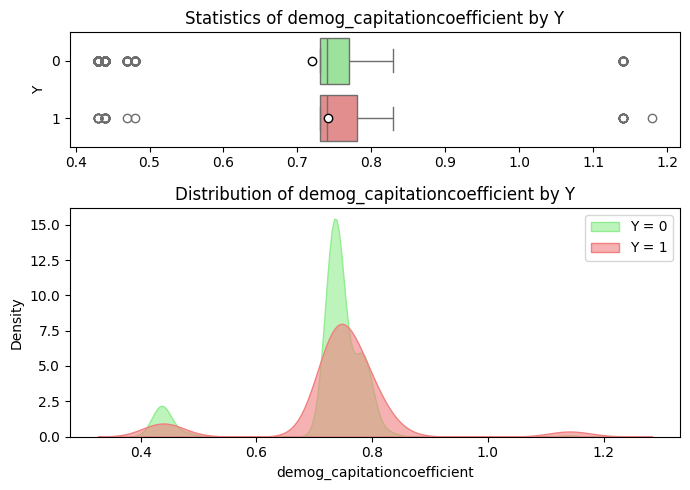

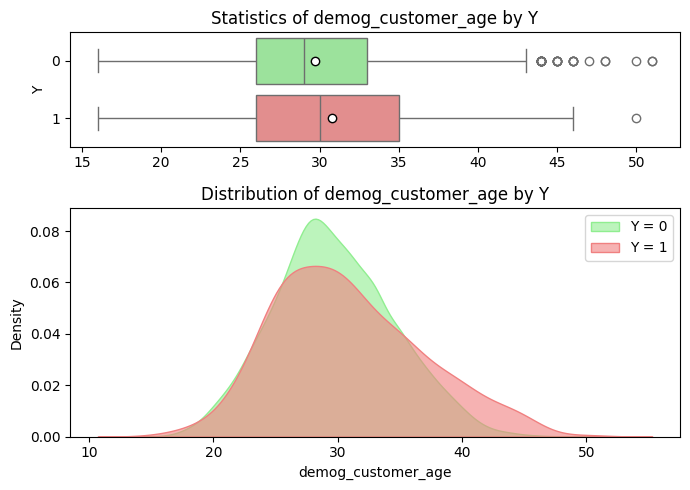

In [19]:
demographic_features = [col for col in df.columns if col.startswith('demog')]
statistics_plots(df,demographic_features)

what happend with woman above 40 years old?
Older age has an effect on Y both in age and capitation coeff.

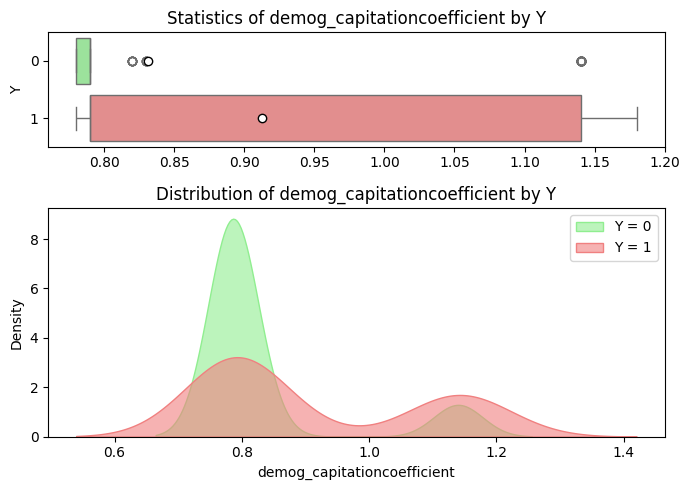

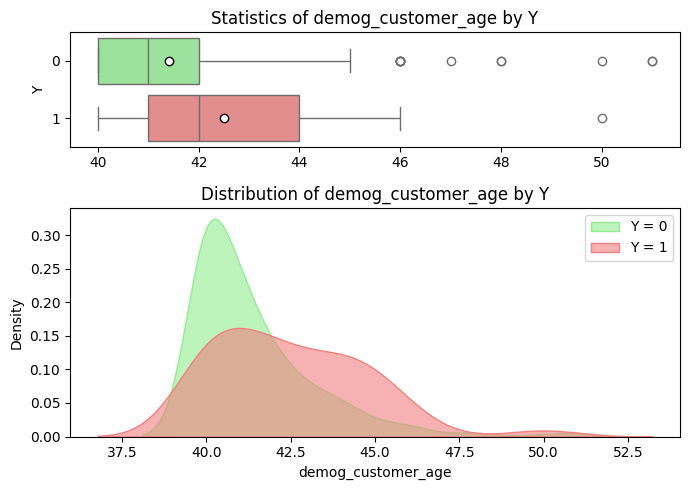

In [20]:
df_age_above_40 = df[df['demog_customer_age'] >= 40]
statistics_plots(df_age_above_40,demographic_features)

Let's examine the correlation between each feature and Y, as well as the correlations among the independent variables:

In [21]:
correlations = pearson_corr_with_Y(df_age_above_40, demographic_features, target = 'Y')
print(correlations.head(10))

demog_capitationcoefficient    0.219820
demog_customer_age             0.188137
Name: Y, dtype: float64


In [40]:
corr_matrix = df[demographic_features].corr()
corr_matrix

demog_capitationcoefficient  demog_customer_age
demog_capitationcoefficient                     1.000000            0.693993
demog_customer_age                              0.693993            1.000000

### 3.2 Smoking Features

The 'smoking_years' feature contains unrealistic values exceeding 100, while the average life expectancy is around 80

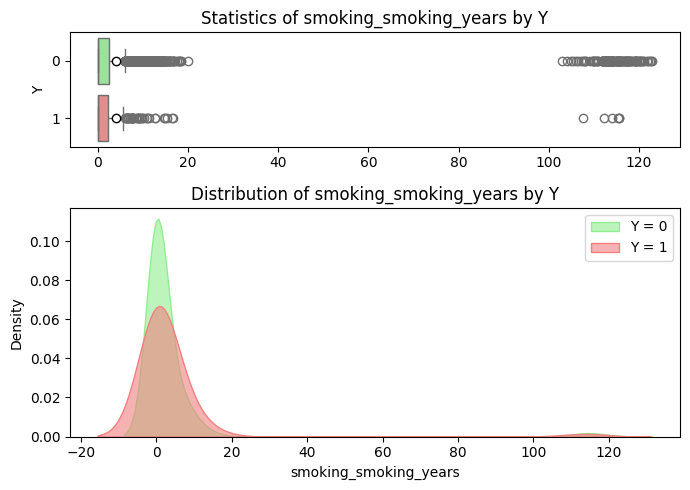

In [23]:
#smoking_features = [col for col in df.columns if col.startswith('smoking')]
smoking_features = ['smoking_smoking_years']
statistics_plots(df,smoking_features)

I will create a binary feature of is_smoker, and check the impact on Y:

In [25]:
df['is_smoker'] = np.where(df['smoking_is_smoker'].isin([1, 2]), 1, 0)

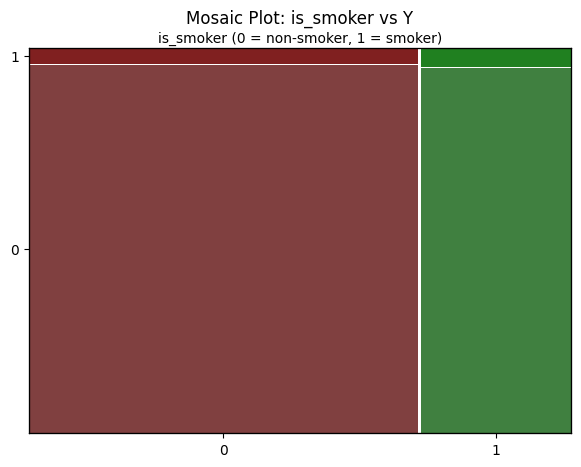

In [26]:
from statsmodels.graphics.mosaicplot import mosaic

ct = pd.crosstab(df['is_smoker'], df['Y'])

data_dict = {(str(smoker), str(y)): ct.loc[smoker, y] for smoker in ct.index for y in ct.columns}

fig, _ = mosaic(data_dict, title = 'Mosaic Plot: is_smoker vs Y', labelizer = lambda k: "")
plt.xlabel("is_smoker (0 = non-smoker, 1 = smoker)")
plt.ylabel("Y (0 = no complication, 1 = complication)")
plt.show()

There is no significant effect

### 3.3 Lab Features

The conclusions are included in the attached PDF

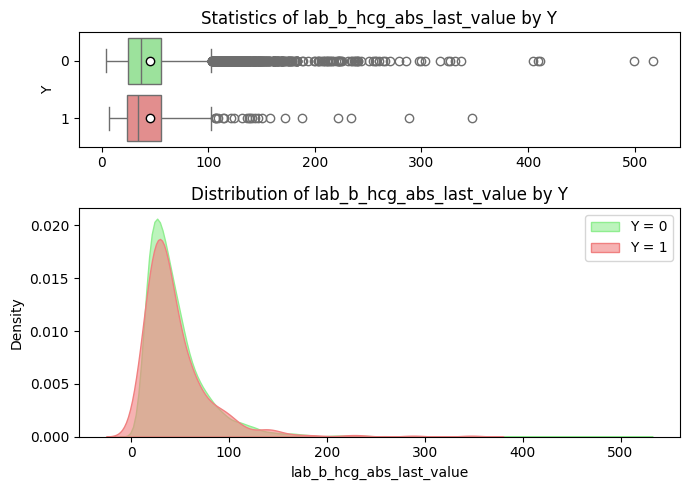

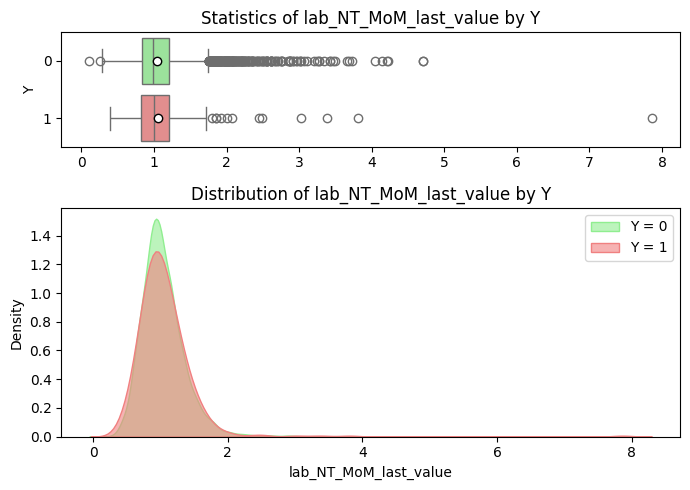

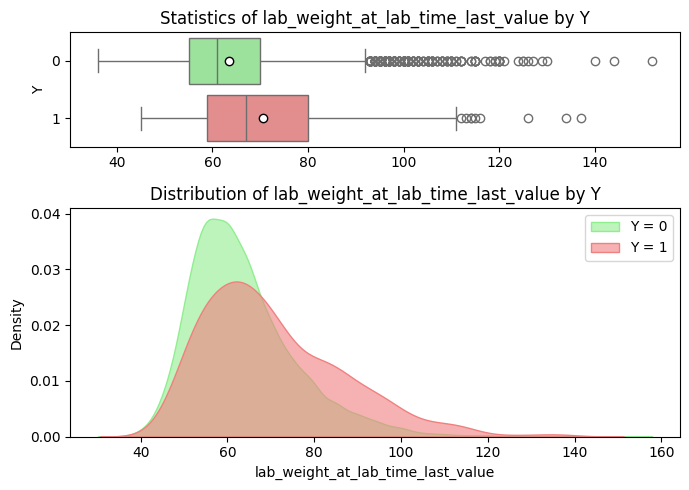

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


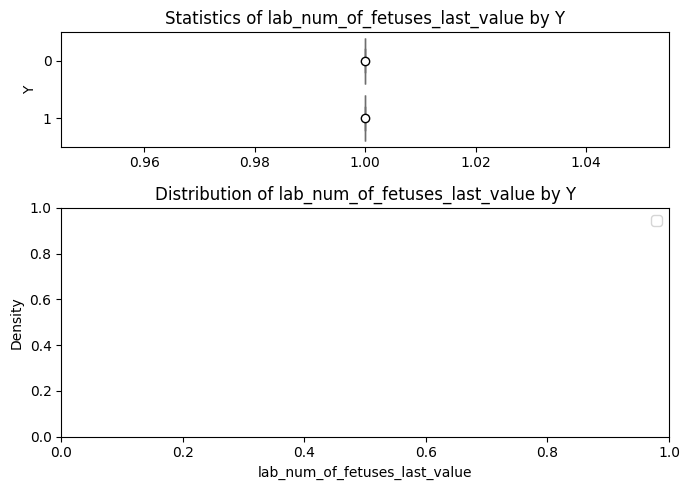

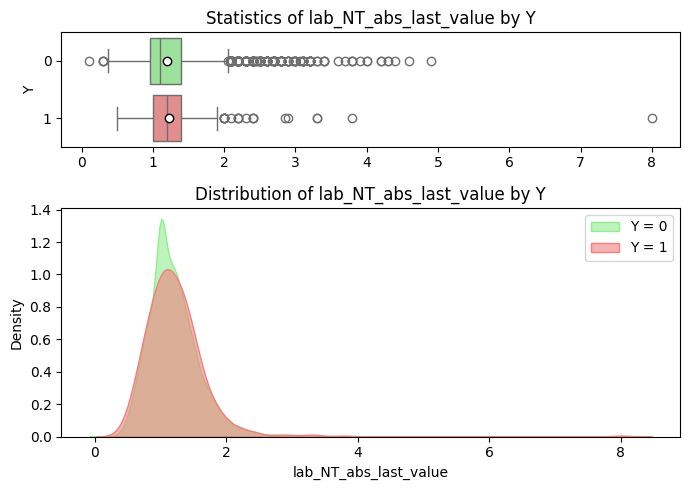

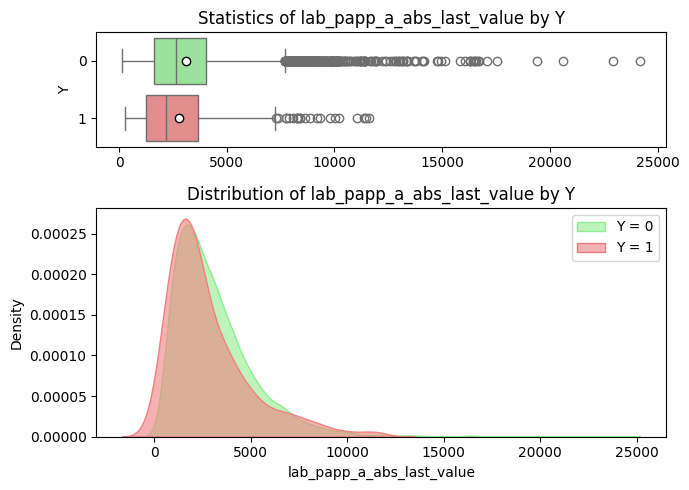

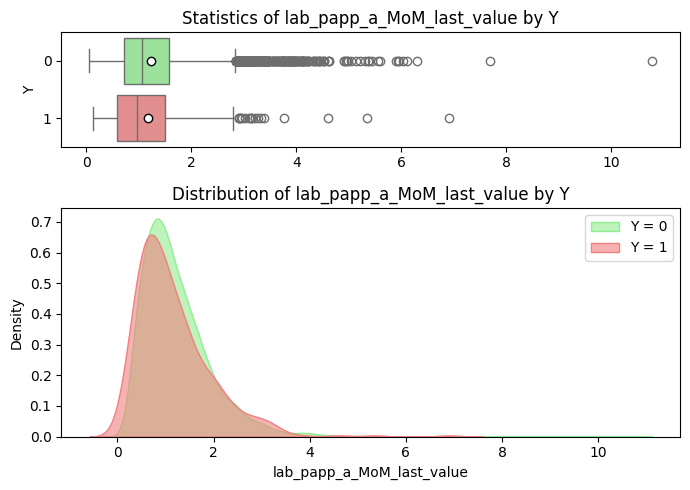

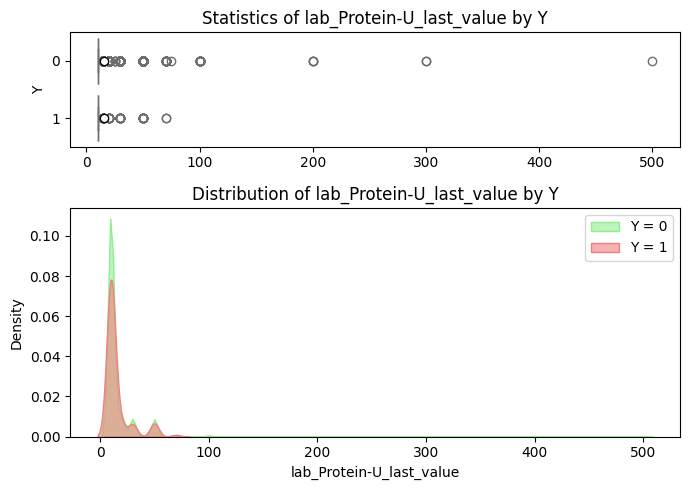

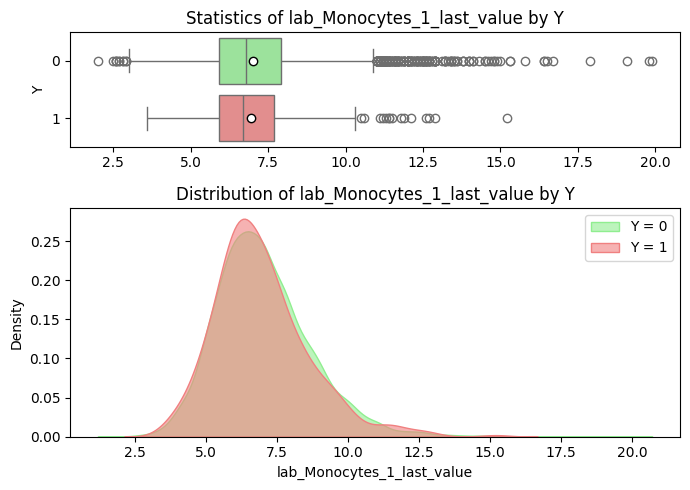

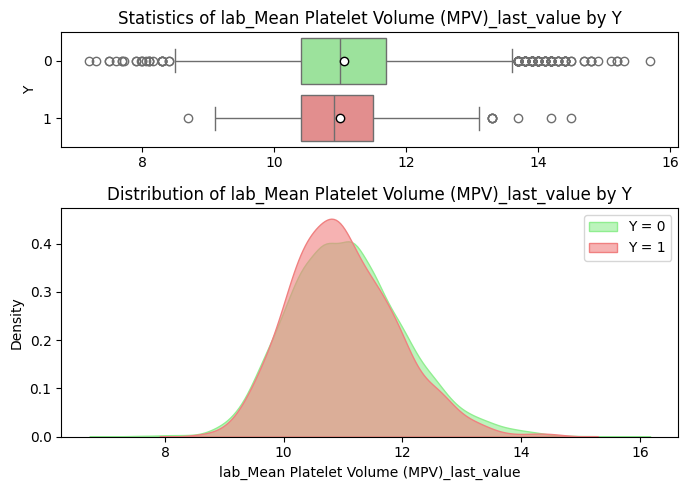

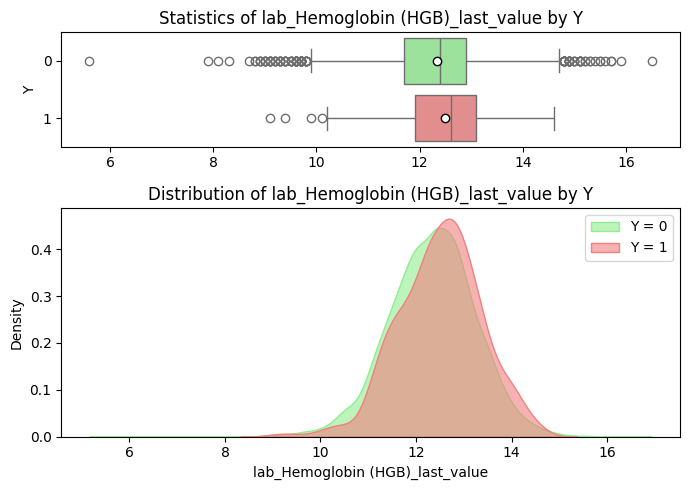

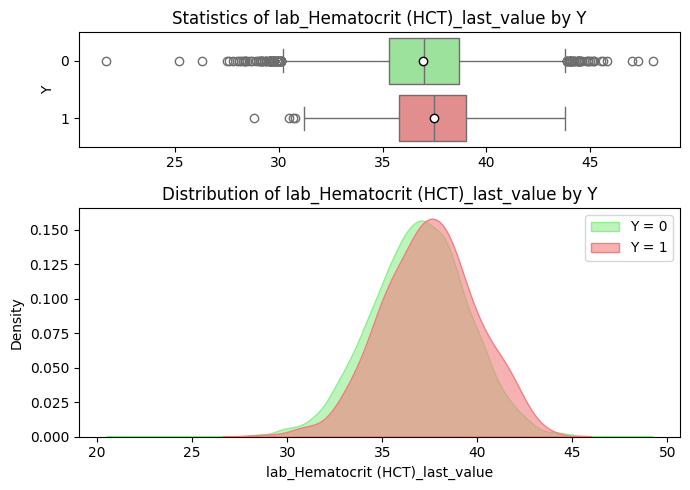

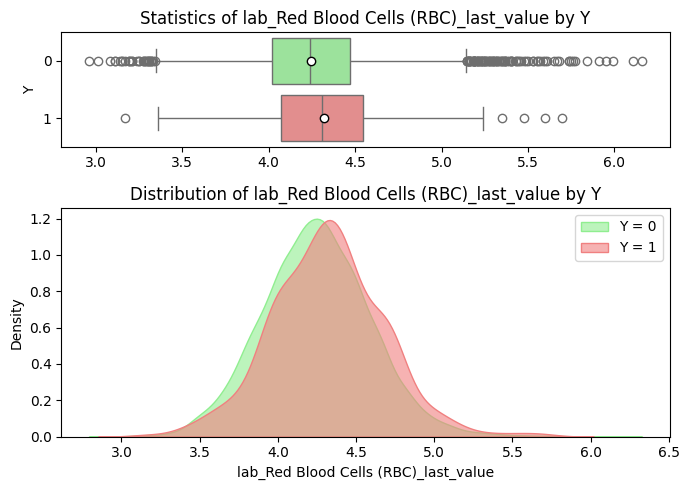

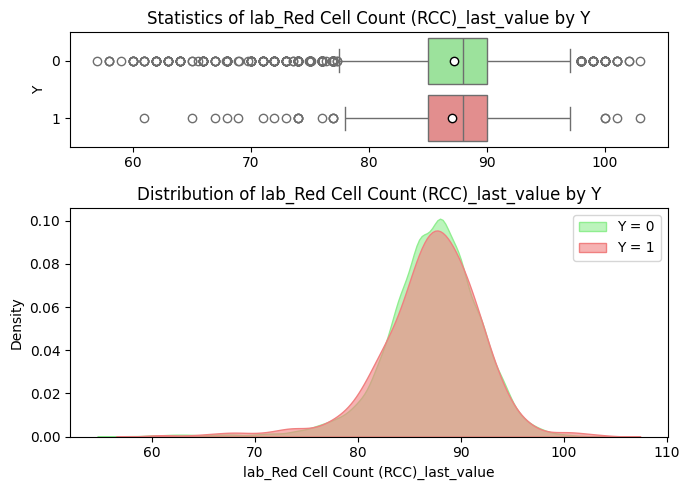

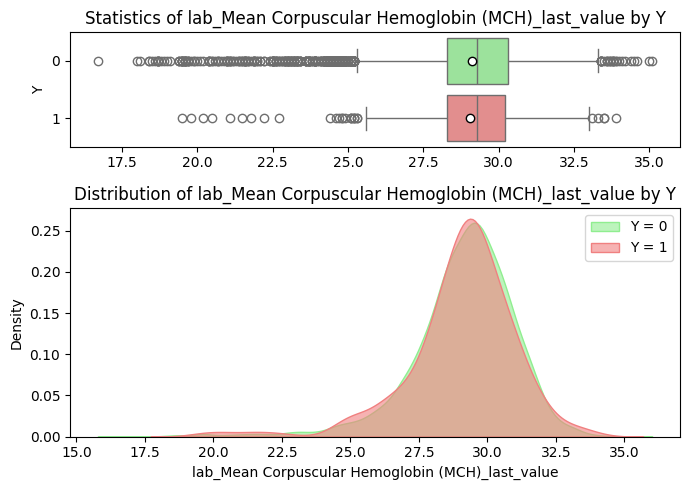

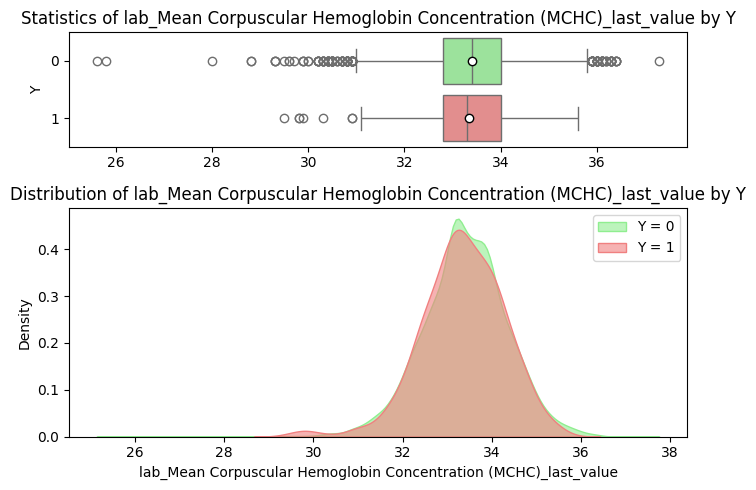

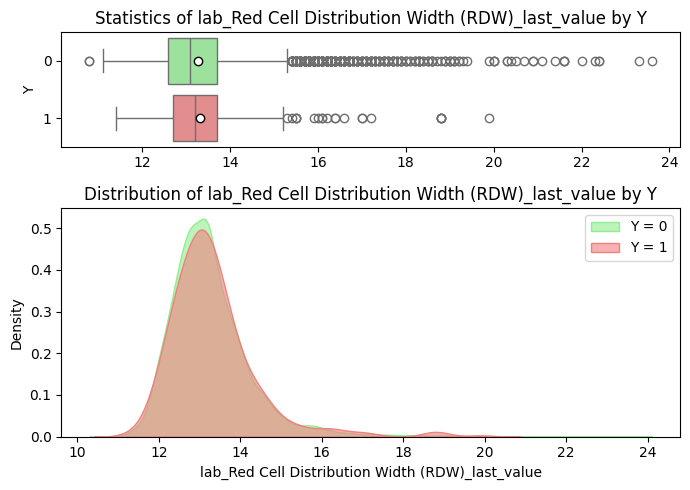

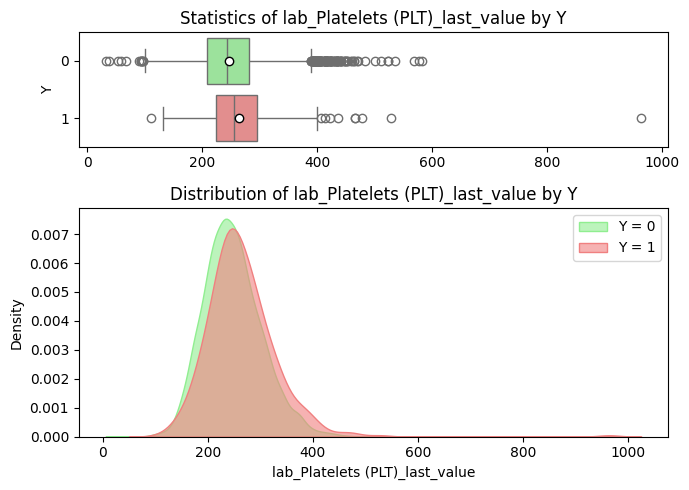

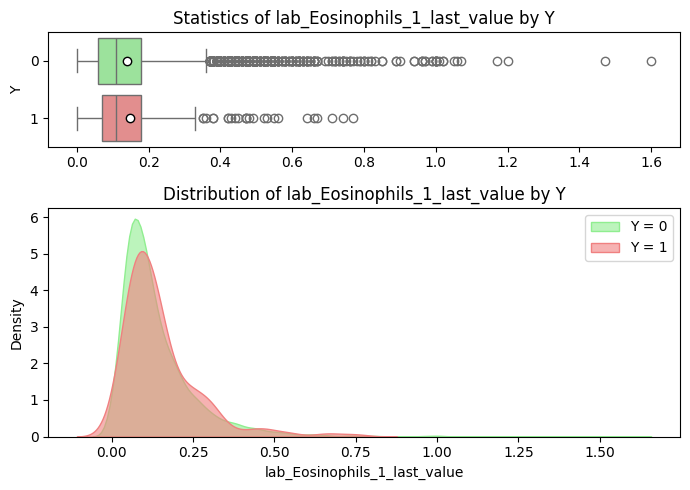

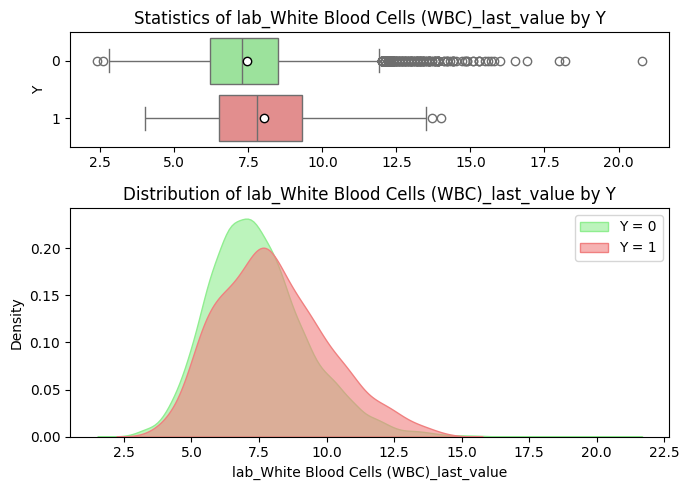

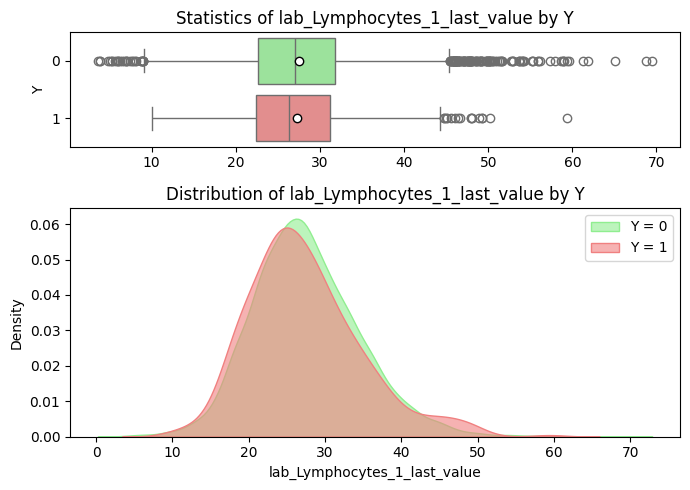

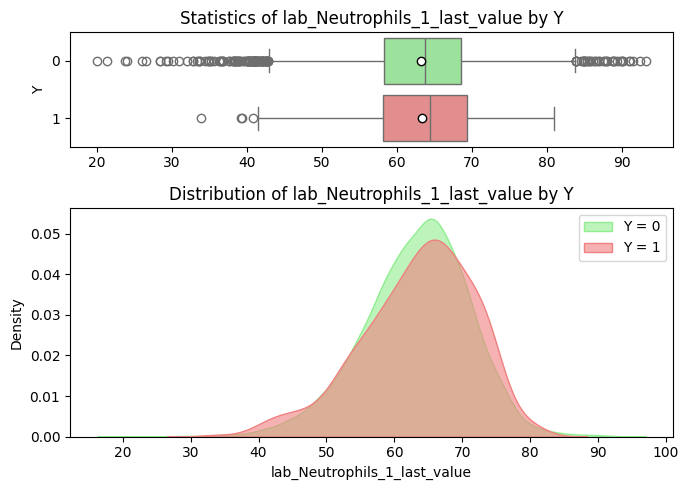

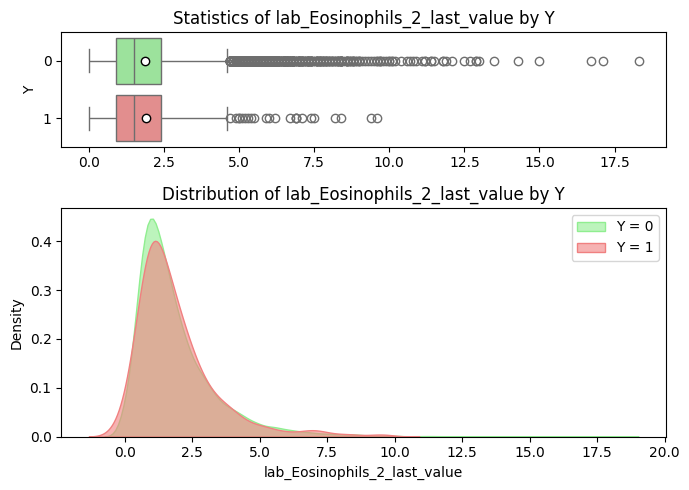

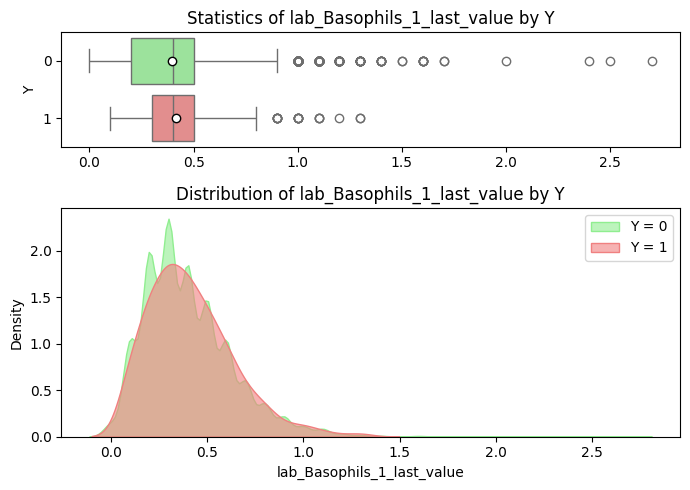

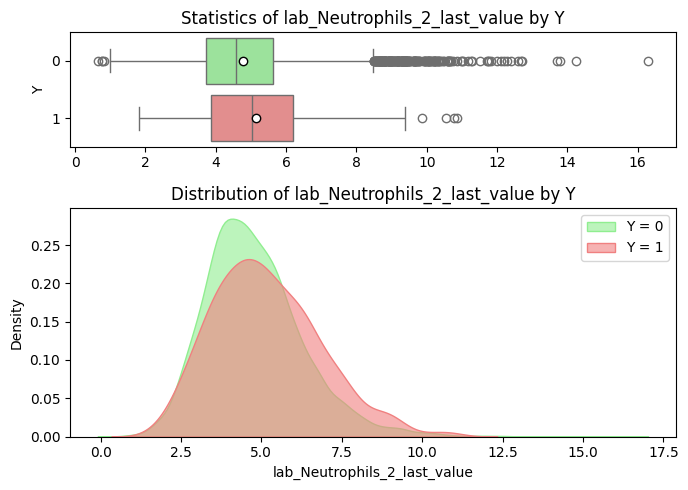

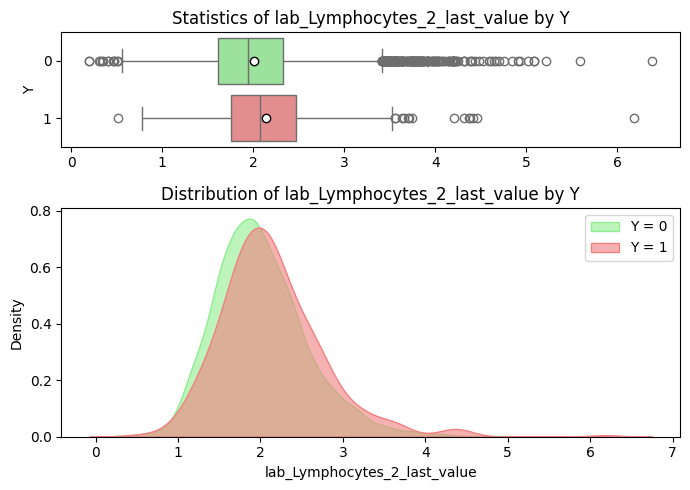

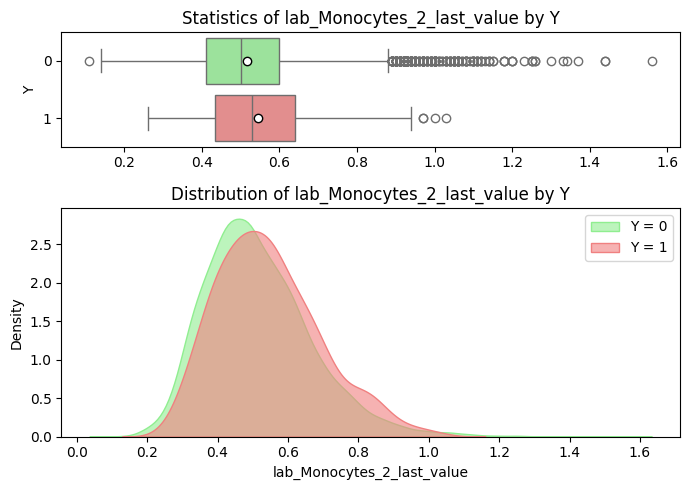

In [28]:
lab_features = [col for col in df.columns if col.startswith('lab_')]
statistics_plots(df,lab_features)

Protein-U’ is a discrete feature, so I’ll examine the proportion of Y=1 within each group:

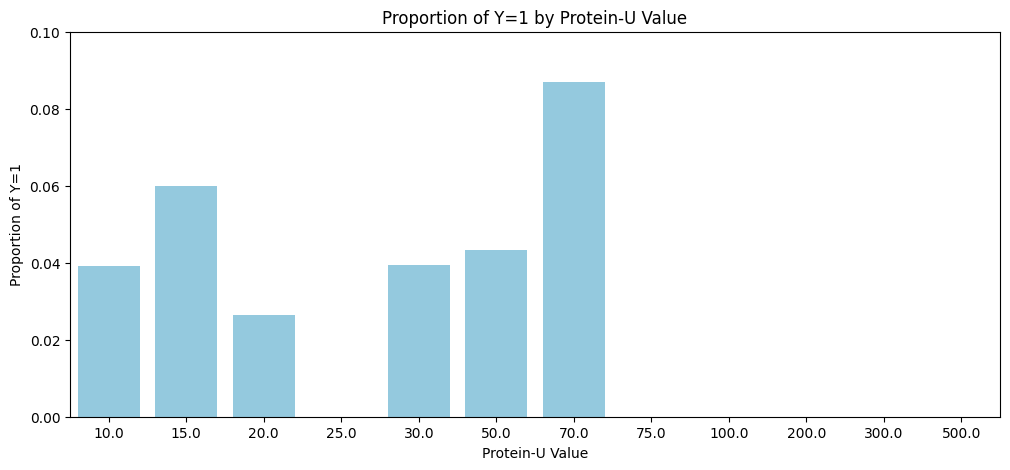

In [29]:
protein_rate = (
    df
    .groupby('lab_Protein-U_last_value')['Y']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 5))
sns.barplot(data=protein_rate, x='lab_Protein-U_last_value', y='Y', color='skyblue')
plt.title("Proportion of Y=1 by Protein-U Value")
plt.xlabel("Protein-U Value")
plt.ylabel("Proportion of Y=1")
plt.ylim(0, 0.1)
plt.show()

In higher values of Protein-U, the proportion of Y=1 is low, while in lower values the average rate is around 4%. 

The group with a Protein-U value of 70 shows a higher rate, reaching nearly 10%.

In [30]:
correlations = pearson_corr_with_Y(df, lab_features, target = 'Y')
print(correlations.head(10))

lab_weight_at_lab_time_last_value         0.114012
lab_White Blood Cells (WBC)_last_value    0.061399
lab_Platelets (PLT)_last_value            0.059889
lab_Neutrophils_2_last_value              0.050761
lab_Lymphocytes_2_last_value              0.046813
lab_Hematocrit (HCT)_last_value           0.042489
lab_Red Blood Cells (RBC)_last_value      0.040643
lab_Monocytes_2_last_value                0.037953
lab_Hemoglobin (HGB)_last_value           0.035702
lab_Eosinophils_1_last_value              0.015763
Name: Y, dtype: float64


In [31]:
high_corrs = get_highly_correlated_pairs(df, lab_features, threshold=0.8)
high_corrs

Feature 1  \
4                               lab_NT_abs_last_value   
271                      lab_Neutrophils_2_last_value   
227                      lab_Eosinophils_2_last_value   
54                    lab_Hematocrit (HCT)_last_value   
90   lab_Mean Corpuscular Hemoglobin (MCH)_last_value   
14                          lab_papp_a_MoM_last_value   
209                      lab_Neutrophils_1_last_value   

                                  Feature 2  Correlation  
4                     lab_NT_MoM_last_value     0.942412  
271  lab_White Blood Cells (WBC)_last_value     0.930620  
227            lab_Eosinophils_1_last_value     0.929864  
54          lab_Hemoglobin (HGB)_last_value     0.924765  
90      lab_Red Cell Count (RCC)_last_value     0.910560  
14                lab_papp_a_abs_last_value     0.878515  
209            lab_Lymphocytes_1_last_value    -0.954148

### 3.4 Measures Features

The conclusions are included in the attached PDF

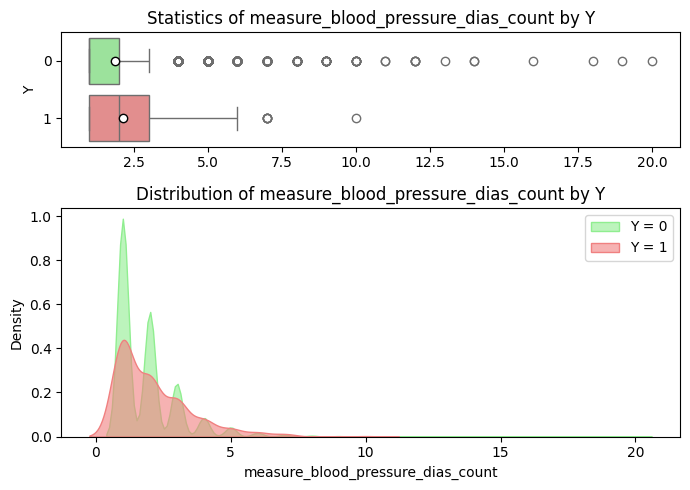

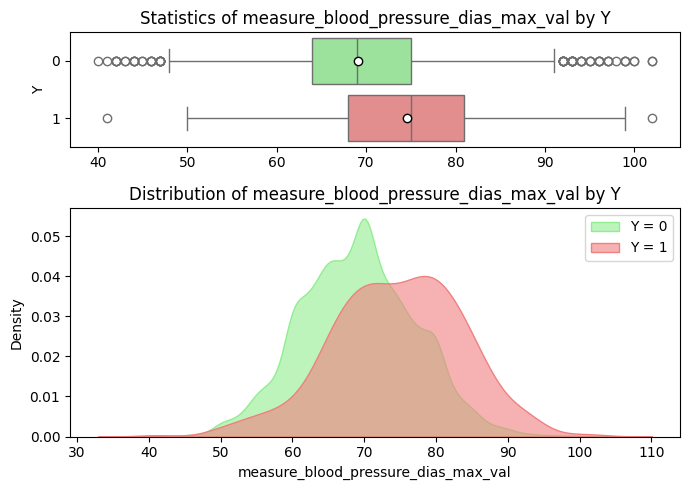

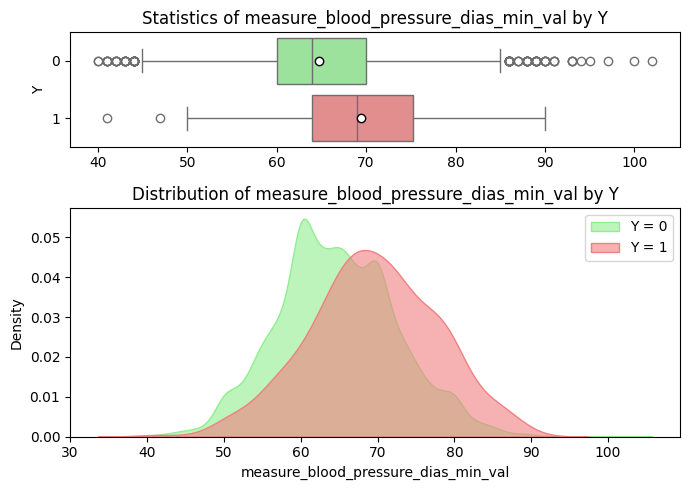

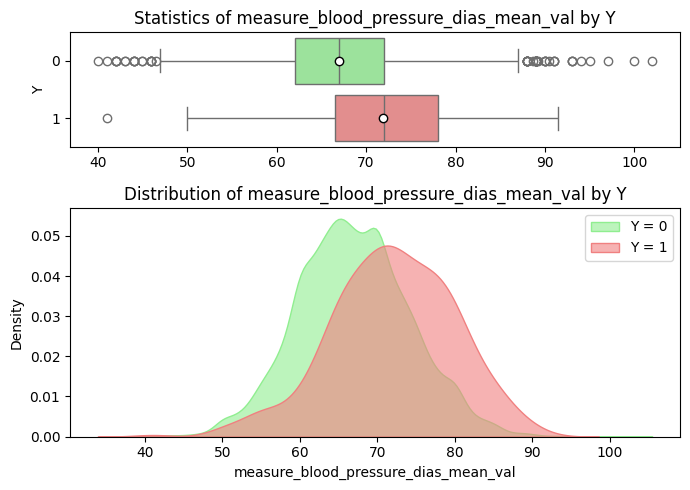

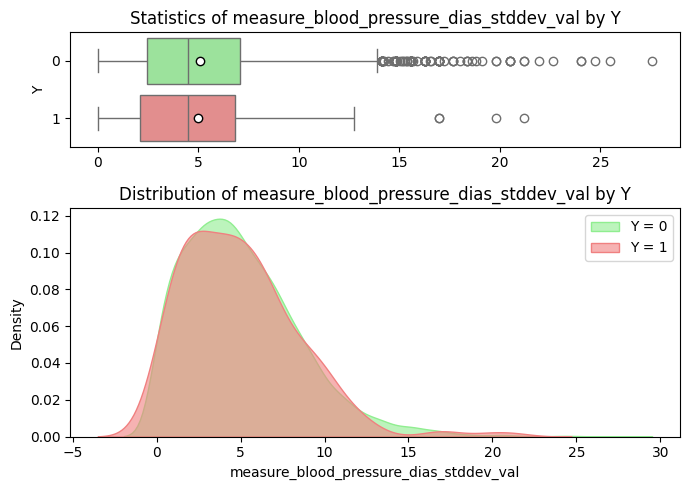

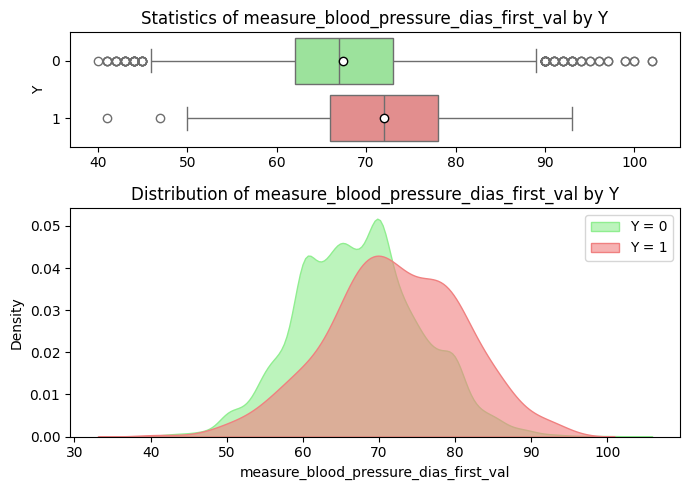

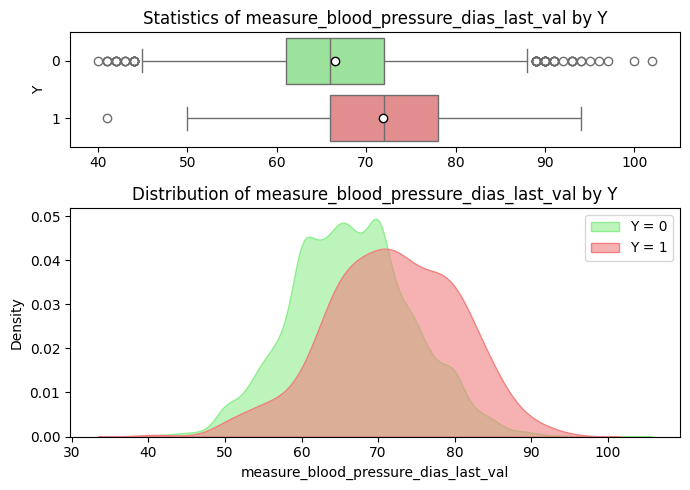

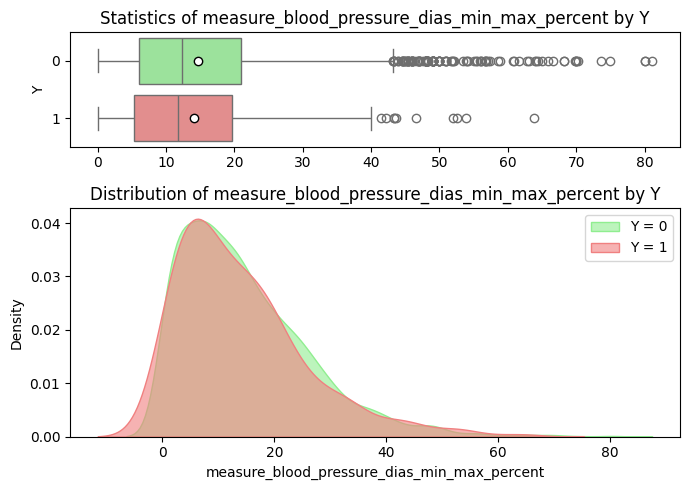

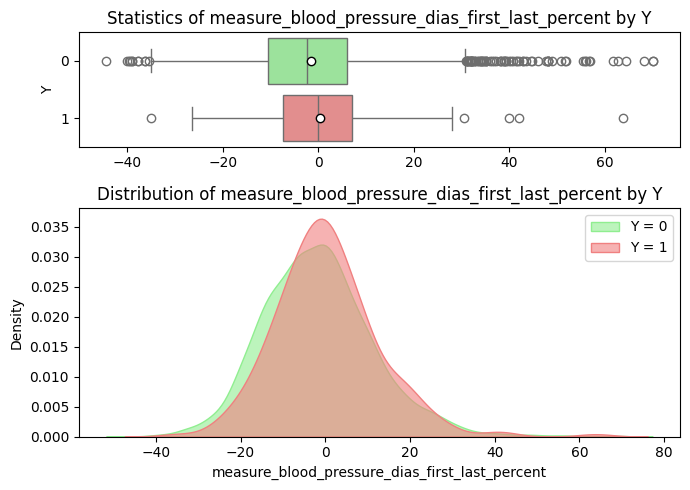

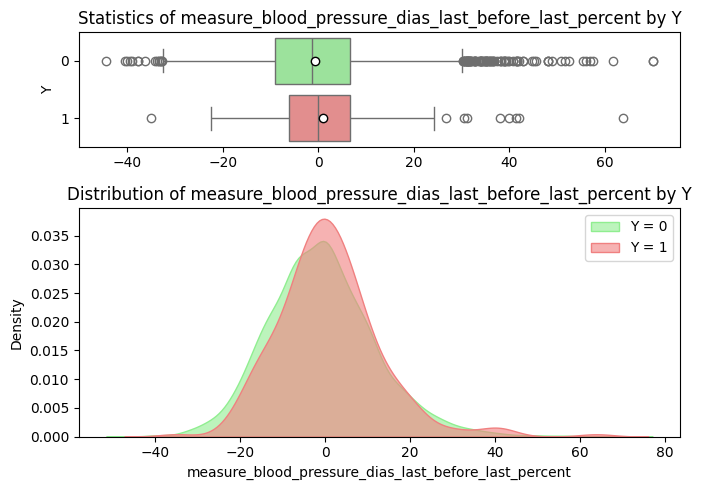

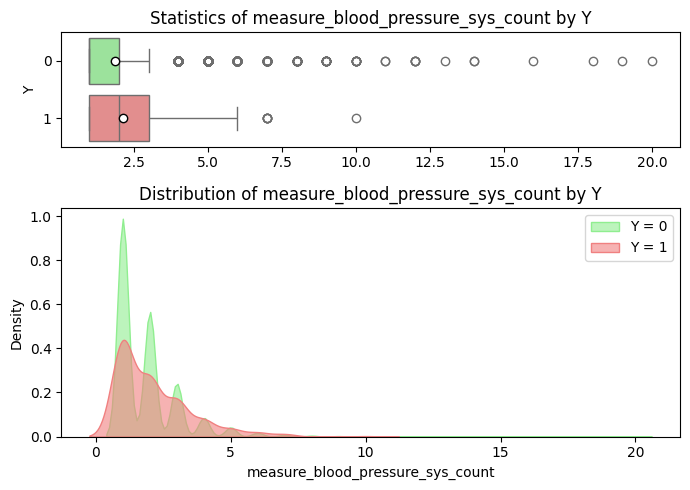

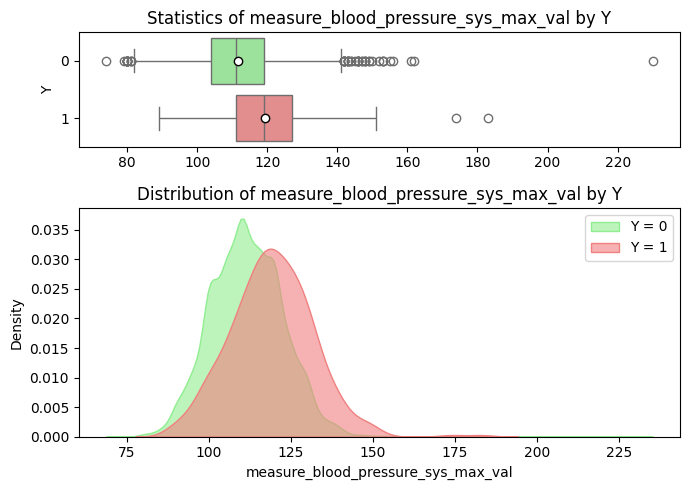

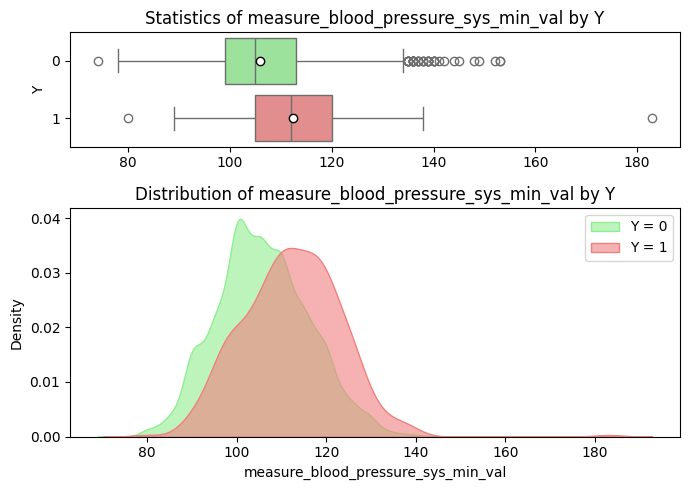

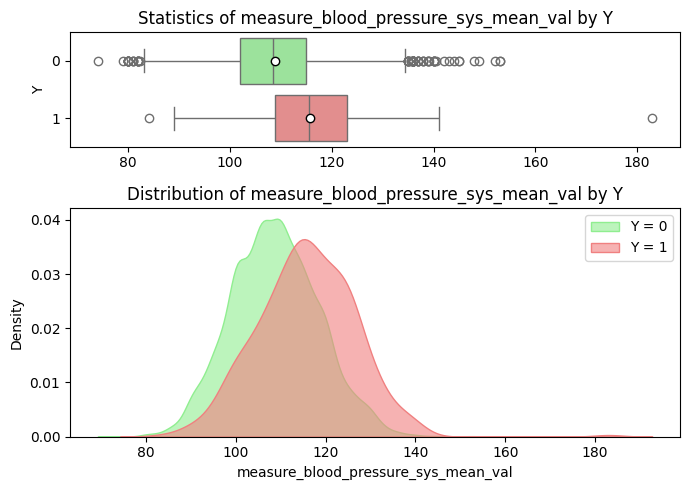

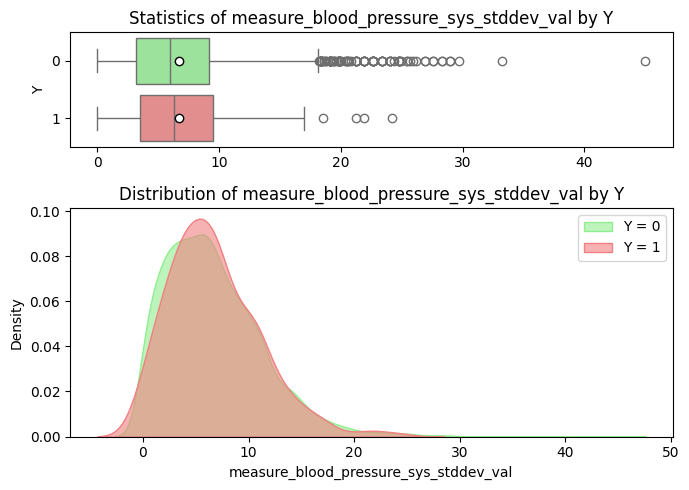

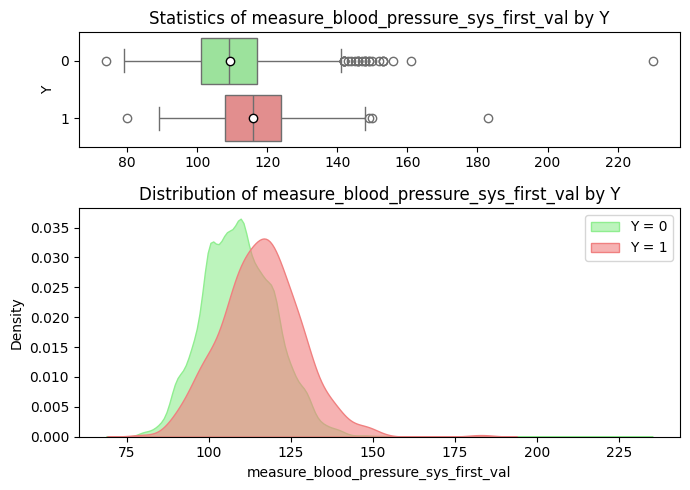

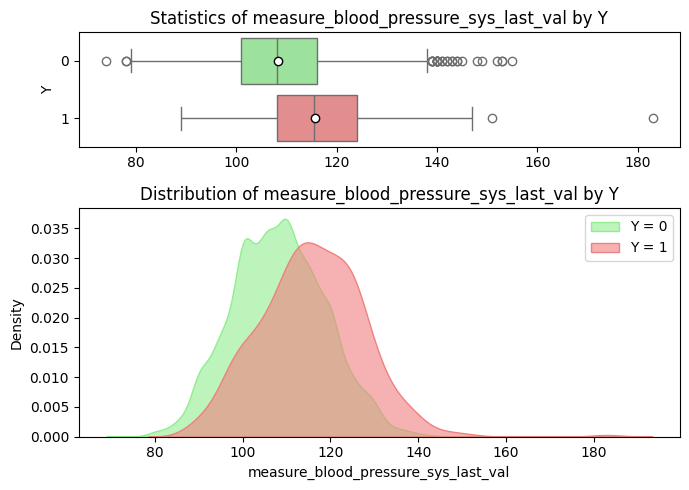

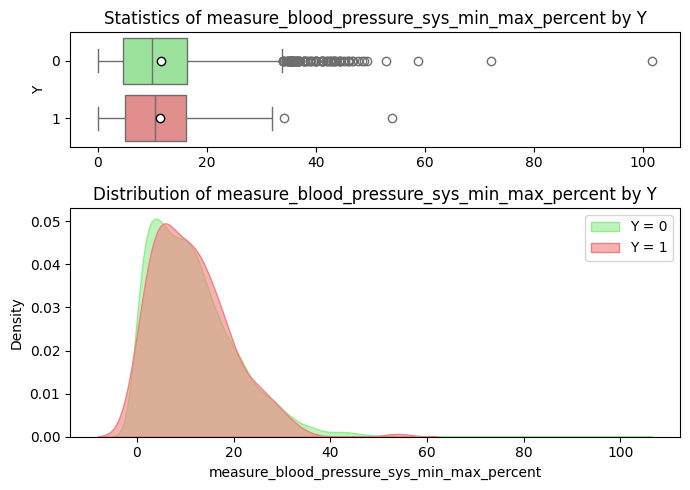

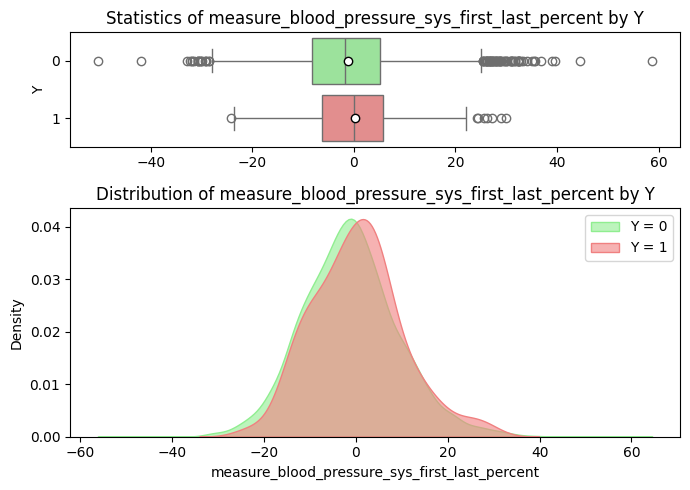

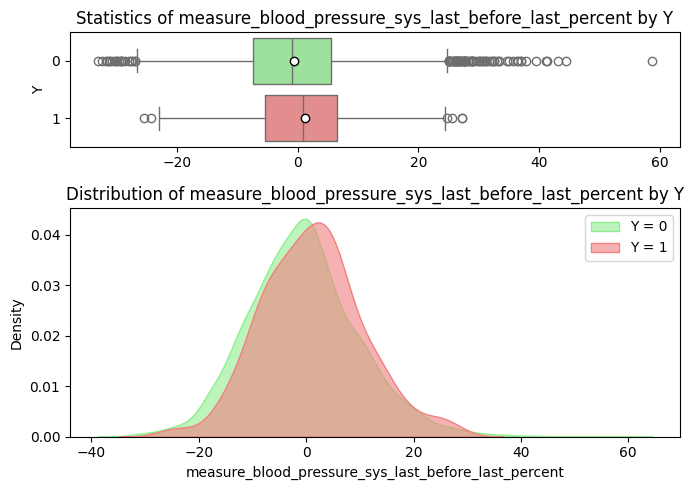

In [32]:
measure_features = [col for col in df.columns if col.startswith('measure')]
statistics_plots(df,measure_features)

In [33]:
measure_correlations = pearson_corr_with_Y(df, measure_features, target='Y')
print(measure_correlations.head(10))

measure_blood_pressure_sys_mean_val      0.143450
measure_blood_pressure_sys_last_val      0.140821
measure_blood_pressure_sys_max_val       0.139198
measure_blood_pressure_dias_mean_val     0.138118
measure_blood_pressure_dias_max_val      0.135137
measure_blood_pressure_dias_last_val     0.134608
measure_blood_pressure_sys_min_val       0.124149
measure_blood_pressure_sys_first_val     0.123336
measure_blood_pressure_dias_min_val      0.119659
measure_blood_pressure_dias_first_val    0.115293
Name: Y, dtype: float64


There is a high correlation between the mean, minimum, and maximum blood pressure features

In [34]:
high_corrs = get_highly_correlated_pairs(df, measure_features, threshold=0.8)
high_corrs

Feature 1  \
45              measure_blood_pressure_sys_count   
90           measure_blood_pressure_sys_mean_val   
89           measure_blood_pressure_sys_mean_val   
5           measure_blood_pressure_dias_mean_val   
4           measure_blood_pressure_dias_mean_val   
133          measure_blood_pressure_sys_last_val   
150   measure_blood_pressure_sys_min_max_percent   
118         measure_blood_pressure_sys_first_val   
18          measure_blood_pressure_dias_last_val   
13         measure_blood_pressure_dias_first_val   
25   measure_blood_pressure_dias_min_max_percent   
116         measure_blood_pressure_sys_first_val   
11         measure_blood_pressure_dias_first_val   
132          measure_blood_pressure_sys_last_val   
17          measure_blood_pressure_dias_last_val   
131          measure_blood_pressure_sys_last_val   
117         measure_blood_pressure_sys_first_val   
16          measure_blood_pressure_dias_last_val   

                                  Feature 2  Correlation  
45        measure_blood_pressure_dias_count     1.000000  
90       measure_blood_pressure_sys_min_val     0.921097  
89       measure_blood_pressure_sys_max_val     0.918387  
5       measure_blood_pressure_dias_min_val     0.916962  
4       measure_blood_pressure_dias_max_val     0.916553  
133     measure_blood_pressure_sys_mean_val     0.912786  
150   measure_blood_pressure_sys_stddev_val     0.909861  
118     measure_blood_pressure_sys_mean_val     0.909530  
18     measure_blood_pressure_dias_mean_val     0.908059  
13     measure_blood_pressure_dias_mean_val     0.907958  
25   measure_blood_pressure_dias_stddev_val     0.900993  
116      measure_blood_pressure_sys_max_val     0.876991  
11      measure_blood_pressure_dias_max_val     0.871618  
132      measure_blood_pressure_sys_min_val     0.868881  
17      measure_blood_pressure_dias_min_val     0.862545  
131      measure_blood_pressure_sys_max_val     0.806012  
117      measure_blood_pressure_sys_min_val     0.804853  
16      measure_blood_pressure_dias_max_val     0.804358

### 3.5 Sums features

I'll examine the frequency of these features among cases where Y = 1

In [39]:
sums_features = [col for col in df.columns if col.endswith('_sum')]

summary = df[sums_features].applymap(lambda x: 1 if x > 0 else 0)
summary_d = summary.sum().sort_values(ascending=False)

In [40]:
summary_d

preeclampsia_sum                                     128
pregnancy_hypertension_sum                           111
essential_hypertension_sum                           100
labs_sum                                              49
eclampsia_sum                                         17
secondary_hypertension_sum                             0
hypertensive_heart_disease_sum                         0
hypertensive_chronic_kidney_disease_sum                0
hypertensive_heart_and_chronic_kidney_disease_sum      0
dtype: int64

I will check whether additional diagnoses appear together

In [41]:
#Interaction
summary['combo'] = summary.apply(lambda row: ','.join([col for col in sums_features if row[col] == 1]), axis=1)
combo_counts = summary['combo'].value_counts()
combo_counts

combo
                                                                                        9713
preeclampsia_sum                                                                          65
pregnancy_hypertension_sum                                                                53
essential_hypertension_sum                                                                45
labs_sum                                                                                  35
essential_hypertension_sum,pregnancy_hypertension_sum                                     21
pregnancy_hypertension_sum,preeclampsia_sum                                               19
essential_hypertension_sum,preeclampsia_sum                                               12
essential_hypertension_sum,pregnancy_hypertension_sum,preeclampsia_sum                     7
preeclampsia_sum,labs_sum                                                                  5
preeclampsia_sum,eclampsia_sum                                  

### 3.6 Date Feature

Only one date in our dataframe, it will be removed in later stages:

In [66]:
pd.to_datetime(df['int_date']).dt.date.unique()

array([datetime.date(1970, 1, 1)], dtype=object)

## 4. Relationship between independent Features

In this section, I will explore three key questions:

    1. Do women with higher weight tend to have higher blood pressure?
    
    2. Do older women tend to have higher blood pressure?
    
    3. Could clotting disorders and/or anemia be associated with pregnancy complications?

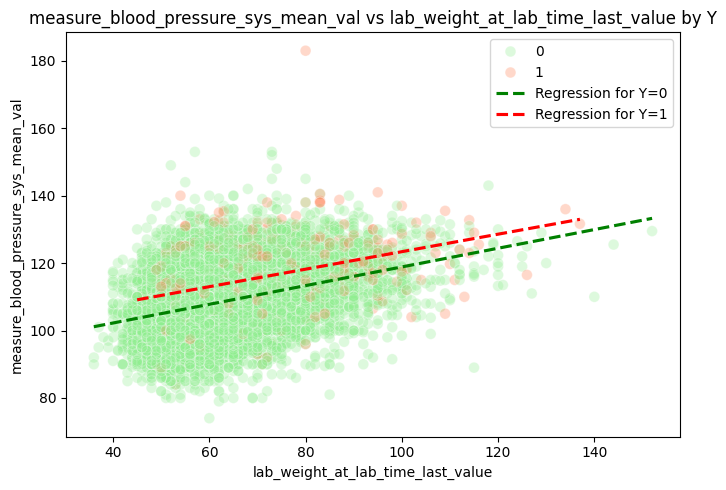

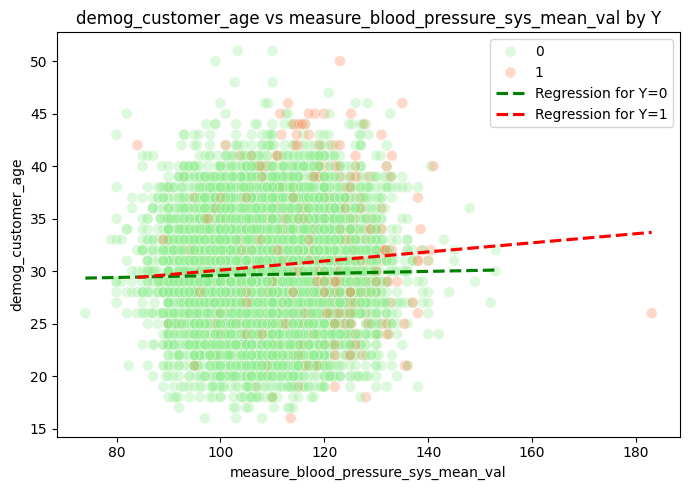

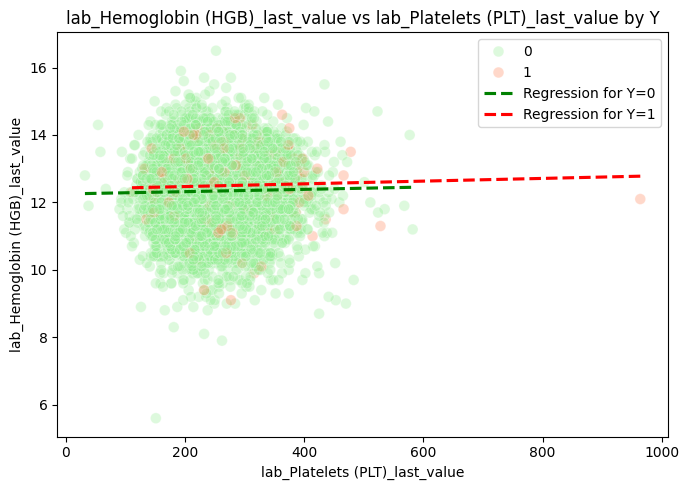

In [42]:
pairs = [
    ('lab_weight_at_lab_time_last_value', 'measure_blood_pressure_sys_mean_val'),
    ('measure_blood_pressure_sys_mean_val','demog_customer_age'),
    ('lab_Platelets (PLT)_last_value', 'lab_Hemoglobin (HGB)_last_value'),
]

for x, y in pairs:
    plt.figure(figsize = (7, 5))

    sns.scatterplot(
        data = df, x = x, y = y, hue = 'Y',
        palette = {0: 'lightgreen', 1: 'coral'},
        alpha = 0.3, s = 60
    )

    # Regression line for each Y group
    for y_val, color in zip([0, 1], ['green', 'red']):
        sns.regplot(
            data = df[df['Y'] == y_val],
            x = x, y = y,
            scatter = False,
            label = f'Regression for Y={y_val}',
            color = color,
            line_kws = {'linestyle': 'dashed'},
            ci = None
        )

    plt.title(f'{y} vs {x} by Y')
    plt.legend()
    plt.tight_layout()
    plt.show()

## 5. Text Feautre

import hebrew stop words:

In [49]:
with open('stopswords_hebrew_list_extend.txt', encoding='utf-8') as f:
    hebrew_stopwords = set(line.strip() for line in f if line.strip())

In [50]:
import re
from wordcloud import WordCloud
from bidi.algorithm import get_display

def clean_text(text):
    text = str(text)
    text = re.sub(r"[^\u0590-\u05FF\s]", "", text)  
    words = text.split()
    words = [w for w in words if w not in hebrew_stopwords and len(w) > 1]
    return " ".join(words)


def generate_wordcloud(df, text_column, title="Word Cloud", font_path='C:\\Windows\\Fonts\\courbd.ttf', width = 800, height = 400):
    """
    Generates a word cloud from clinical_sheet
    """
    cleaned_text = df[text_column].dropna().apply(clean_text)
    all_words = " ".join(cleaned_text.astype(str))
    bidi_text = get_display(all_words)
    
    wordcloud = WordCloud(
        width = width,
        height = height,
        background_color = 'white',
        font_path = font_path
    ).generate(bidi_text)

    plt.figure(figsize = (12, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(title, fontsize = 16)
    plt.show()

### 5.1 All texts

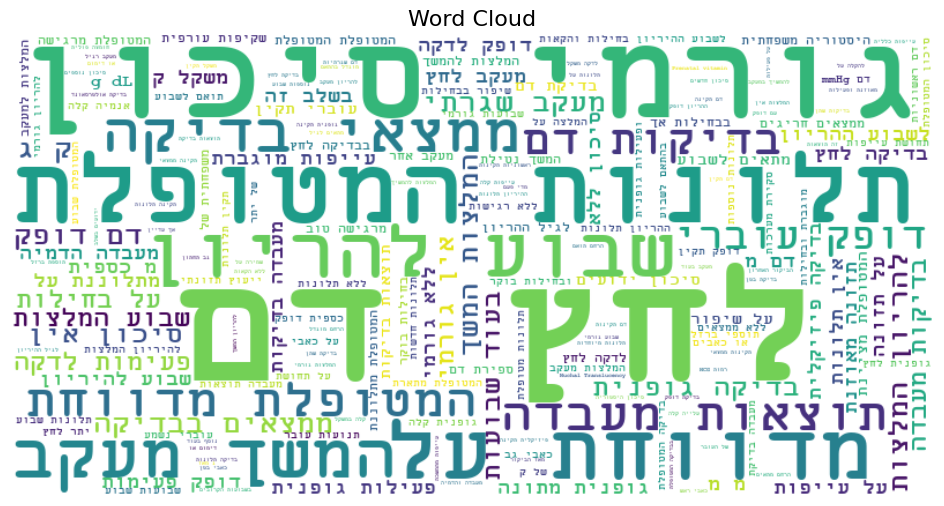

In [52]:
generate_wordcloud(df, text_column='clinical_sheet')

### 5.2 Text where Y=1

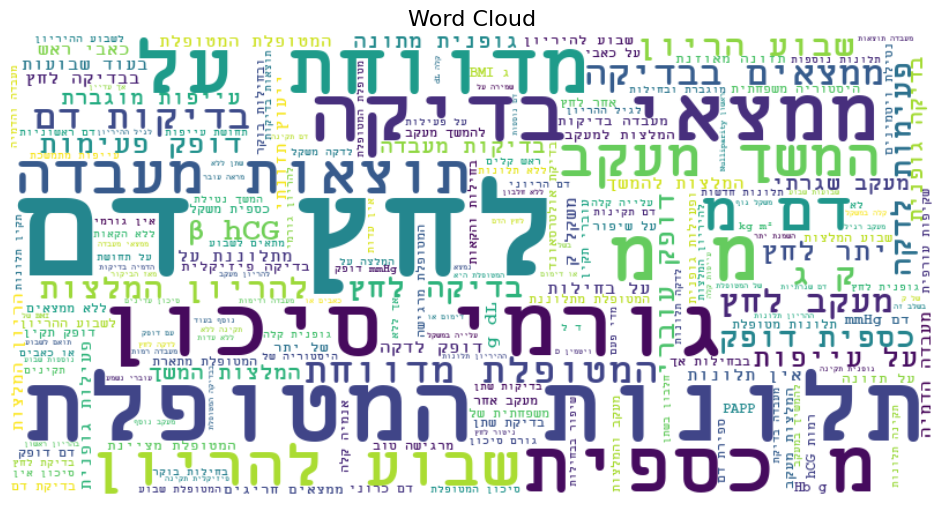

In [53]:
generate_wordcloud(df[df['Y'] == 1], text_column='clinical_sheet')